# Exercici 1

Agrupa els vols utilitzant l'algorisme de K-means.

Group the flights using the K-means algorithm.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DelayedFlights.csv", index_col = 0)

C:\Users\Nuria\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The data consists of flight arrival and departure details for all commercial flights within the USA. Variable descriptions:
* 1 Year; 2008 
* 2 Month; 1-12 
* 3 DayofMonth; 1-31 
* 4 DayOfWeek; 1 (Monday) - 7 (Sunday) 
* 5 DepTime; actual departure time (local, hhmm) 
* 6 CRSDepTime; scheduled departure time (local, hhmm) 
* 7 ArrTime; actual arrival time (local, hhmm) 
* 8 CRSArrTime; scheduled arrival time (local, hhmm) 
* 9 UniqueCarrier; unique carrier code 
* 10 FlightNum; flight number 
* 11 TailNum; plane tail number 
* 12 ActualElapsedTime; in minutes 
* 13 CRSElapsedTime; in minutes 
* 14 AirTime; in minutes 
* 15 ArrDelay; arrival delay, in minutes 
* 16 DepDelay; departure delay, in minutes 
* 17 Origin; origin IATA airport code 
* 18 Dest; destination IATA airport code 
* 19 Distance; in miles 
* 20 TaxiIn; taxi in time, in minutes 
* 21 TaxiOut; taxi out time in minutes 
* 22 Cancelled; was the flight cancelled? 
* 23 CancellationCode; reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
* 24 Diverted; 1 = yes, 0 = no 
* 25 CarrierDelay; in minutes 
* 26 WeatherDelay; in minutes 
* 27 NASDelay; in minutes 
* 28 SecurityDelay; in minutes 
* 29 LateAircraftDelay; in minutes

We are first deleting some columns that are not needed. The Year column, that is always 2008; the Cancelled column, as well as the rows that have cancelled = 1, because those are of no interest if we are studying delay; the CancellationCode column, for the same reasons; the Diverted column, as well as the rows that have diverted = 1, because those are of no interest if we are studying delay; and the Origin and Dest because they add no real information that the column Distance doesn't provide, as well as the TailNum column.

In [3]:
#remove the Year column
df = df.drop(["Year"], axis = 1)

#keep only rows that were not cancelled
df = df[df.Cancelled == 0]

#remove the Cancelled row
df = df.drop(["Cancelled"], axis = 1)

#remove CancellationCode column
df = df.drop(["CancellationCode"], axis = 1)

#keep only rows that were not diverted
df = df[df.Diverted == 0]

#remove the Diverted row
df = df.drop(["Diverted"], axis = 1)

#remove the Origin, Dest, and TailNum row
df = df.drop(["Origin", "Dest", "TailNum"], axis = 1)

df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


We are now going to take care of the NaN values as well.

In [4]:
df.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

The large number of NaN values coincide with an arrival delay of 15 or less, as those atributes were only filled in when there was a greater delay than that. Hence, the best option we have is to fill those NaN with 0.

In [4]:
#filling NaN values in these columns with their median
df["CarrierDelay"] = df["CarrierDelay"].fillna(0)
df["WeatherDelay"] = df["WeatherDelay"].fillna(0)
df["NASDelay"] = df["NASDelay"].fillna(0)
df["SecurityDelay"] = df["SecurityDelay"].fillna(0)
df["LateAircraftDelay"] = df["LateAircraftDelay"].fillna(0)

In [6]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,-14.0,8.0,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,2.0,19.0,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,14.0,8.0,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,11.0,25.0,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0


K-Means clustering is a clustering technique where the data is classified in one of the given classes or groups. These groups have a center point first given randomly, and then based on the classified points, it is recalculated by taken the mean of all the vectors in its group, until the groups centers stop changing after every iteration. 

Before clustering, we need to normalize the data using MinMaxScaler() and apply PCA to it.

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#normalize numeric atributes
x = df[["Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "FlightNum", "ActualElapsedTime", 
        "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Distance", "TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", 
        "NASDelay", "SecurityDelay", "LateAircraftDelay"]]
norm = MinMaxScaler().fit_transform(x)

Text(0, 0.5, 'Cumulative explained variance')

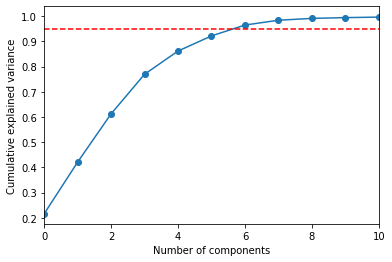

In [6]:
pca = PCA().fit(norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o")
plt.axhline(0.95, color = "r", linestyle = "--")
plt.xlim([0, 10])
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We will pick 6 as the number of components for the PCA, as it is the lowest number we can choose with more than 95% cumulative explained variance.

In [27]:
#apply pca to the data
pca_components = PCA(n_components = 6).fit_transform(norm)

In [28]:
#creating a dataframe with the pca values
pca_df = pd.DataFrame(data = pca_components, columns = ["pca1", "pca2", "pca3", "pca4", "pca5", "pca6"])

The default value for the number of clusters formed in the K-Means function is eight. This might be too many clusters in our case, and it is better to estimate that optimal number of clusters, for example with the elbow curve method. We need to perform the K-Means clustering with different values of k and calculate the average distances to the group centers across all data points. Then, we plot those points and find the one where the average distance from the center falls suddenly, creating an elbow-like figure, as seen in the example below.

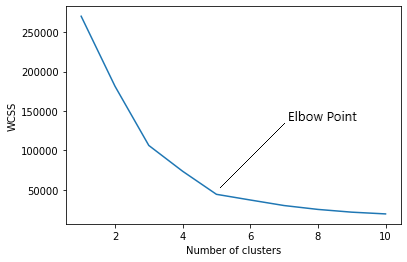
source: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

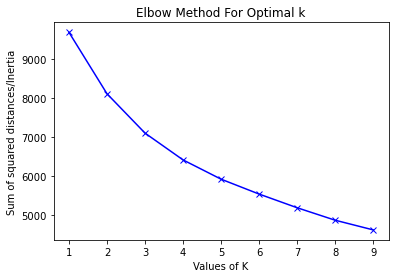

In [29]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K :
 kmeans = KMeans(n_clusters = num_clusters, init = "random", random_state = 42)
 kmeans.fit(pca_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In this graph we can't tell clearly which point is the elbow, so we will use a KneeLocator to pinpoint it.

In [10]:
from kneed import KneeLocator
kl = KneeLocator(K, Sum_of_squared_distances, S = 1.0, curve = "convex", direction = "decreasing")
print(round(kl.elbow, 3))

4


In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = "random", random_state = 42, n_clusters = 4)
x = kmeans.fit(pca_df)

In [9]:
pca_df["predicted_cluster"] = kmeans.labels_

Since the dataset is so big, creating a visualization where the data points don't overlap each other is hard. We will hence sample 1% of it for the sake of graphing the results.

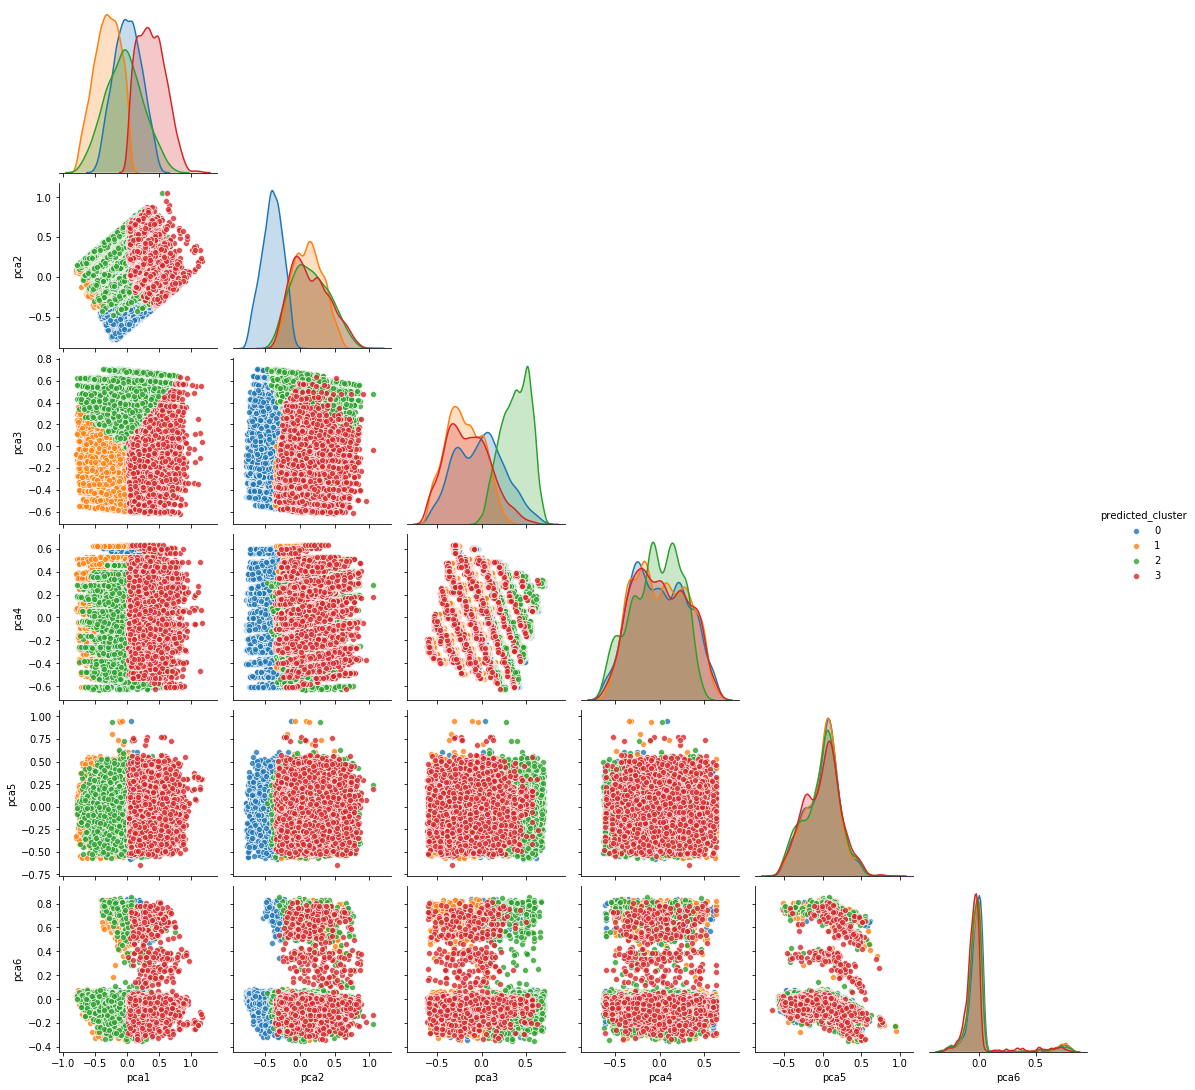

In [21]:
#making 1% sample
spca_df = pca_df.sample(frac = 0.01, random_state = 0)

#matrix plot of the clusters' distribution amng the pca 
sns.pairplot(spca_df, diag_kind = "auto", corner = True, hue = "predicted_cluster", plot_kws = dict(alpha = 0.8))

In [22]:
pca_df.predicted_cluster.value_counts()

1    523022
0    503731
3    456998
2    444620
Name: predicted_cluster, dtype: int64

The above graph shows that the distribution of the data among the clusters in the PCA components is pretty balanced. However, this doesn't tell us much, as this is heavily transformed data. We want to apply this model now to the original dataset to see how well it performed and how it divided the dataset. 

In [11]:
df["predicted_cluster"] = kmeans.labels_

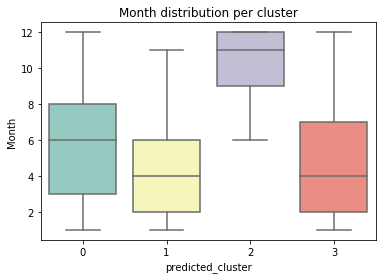

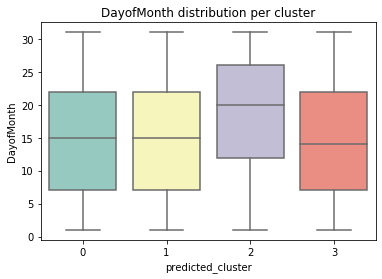

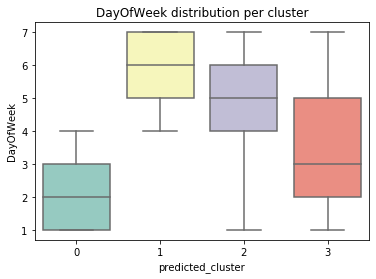

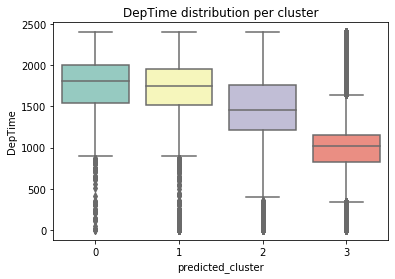

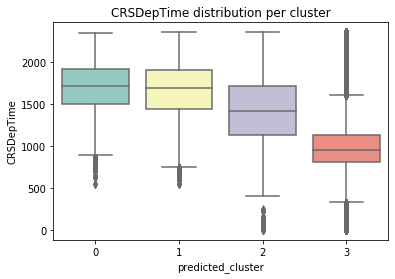

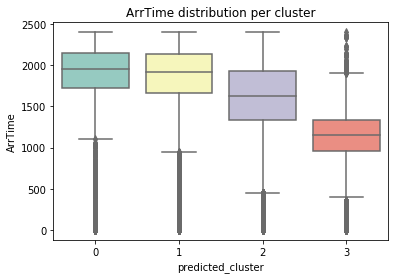

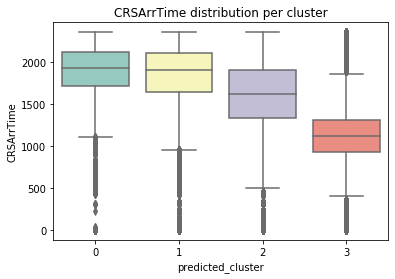

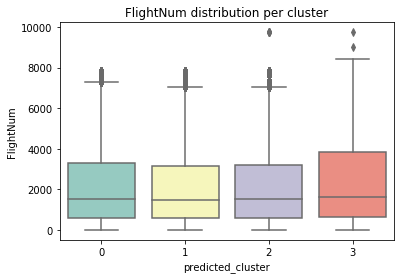

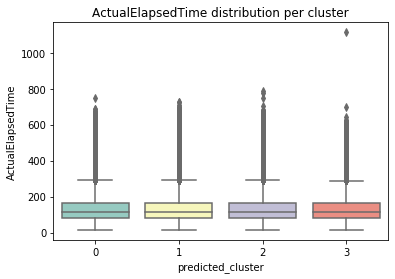

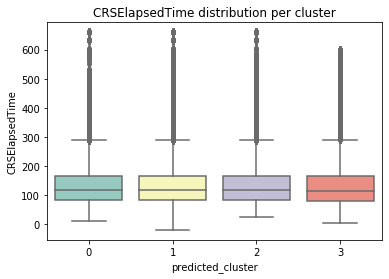

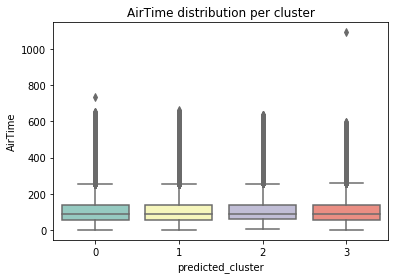

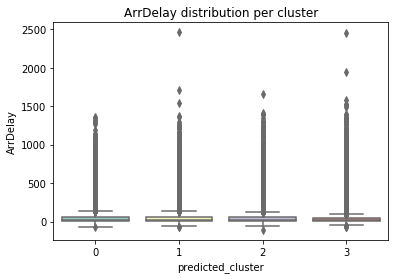

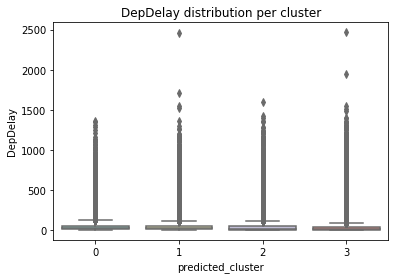

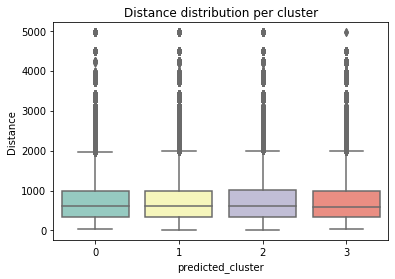

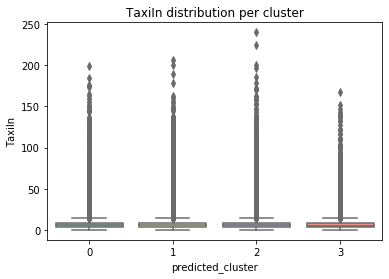

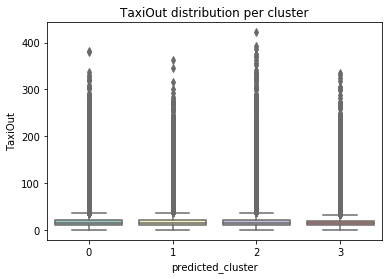

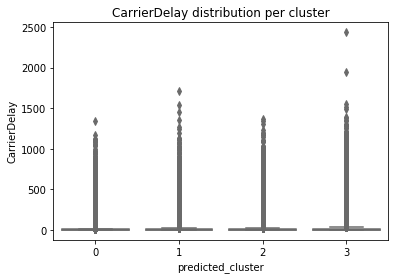

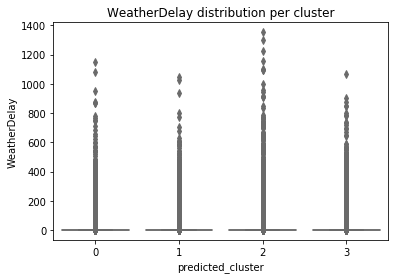

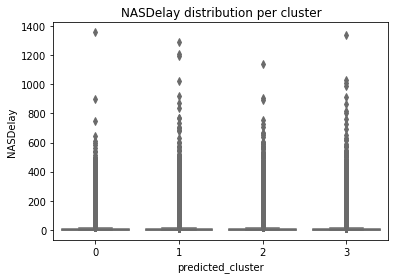

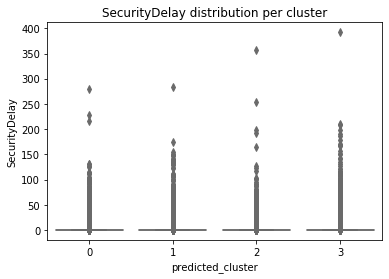

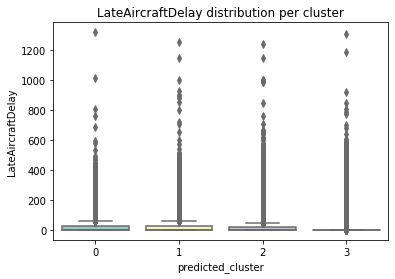

In [24]:
skip = ["UniqueCarrier", "predicted_cluster"]

for i in df:
    if i in skip:
        continue
    sns.boxplot(data = df, y = i, x = "predicted_cluster", palette = "Set3")
    plt.title("{} distribution per cluster".format(i))
    plt.show()

We can see that our model has divided the dataset into clusters taking into account the Month, DayofWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime and somewhat the DayofMonth and FlightNum. For example, we can see that the cluster 2 represents the flights near the end of the year, the cluster 1 holds the flights near the beginning of the year, and the other two, the flights in the middle of the year. 

Since the dataset is so big, creating a visualization where the data points don't overlap each other is hard. We will hence sample 1% of it for the sake of graphing the results.

# Exercici 2

Agrupa els vols utilitzant l'algorisme de clustering jeràrquic.

Group the flights using the hierarchical clustering algorithm.

There are two types of hierarchical clustering algorithms, agglomerative and divisive. Agglomerative approach each data point as a small cluster and merges them to create bigger clusters. Divisive algorithms, however, start with a big single cluster consisting of the whole dataset and breaks it down into smaller clusters.

We will be redoing the PCA, since this algorithm requires us to take a sample of the dataset.

In [12]:
df_sample = df.sample(frac = 0.01, random_state = 0)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#normalize numeric atributes
x = df_sample[["Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "FlightNum", "ActualElapsedTime", 
        "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Distance", "TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", 
        "NASDelay", "SecurityDelay", "LateAircraftDelay"]]
norm = MinMaxScaler().fit_transform(x)

In [14]:
pca_components = PCA(n_components = 6).fit_transform(norm)

#creating a dataframe with the pca values
pca_df = pd.DataFrame(data = pca_components, columns = ["pca1", "pca2", "pca3", "pca4", "pca5", "pca6"])

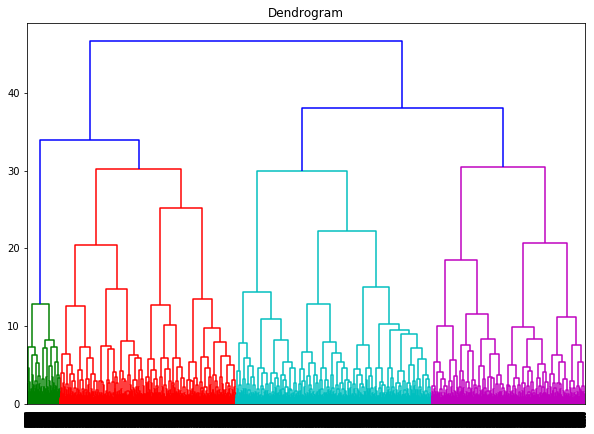

In [35]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 7))  
plt.title("Dendrogram")  
shc.dendrogram(shc.linkage(pca_df, method = "ward"))
plt.show()

A dendrogram helps us decide the number of clusters to state on our model. We picked the method ward for the linkage as it is the optimal for the type of dispersion our data shows, as seen in the example below. 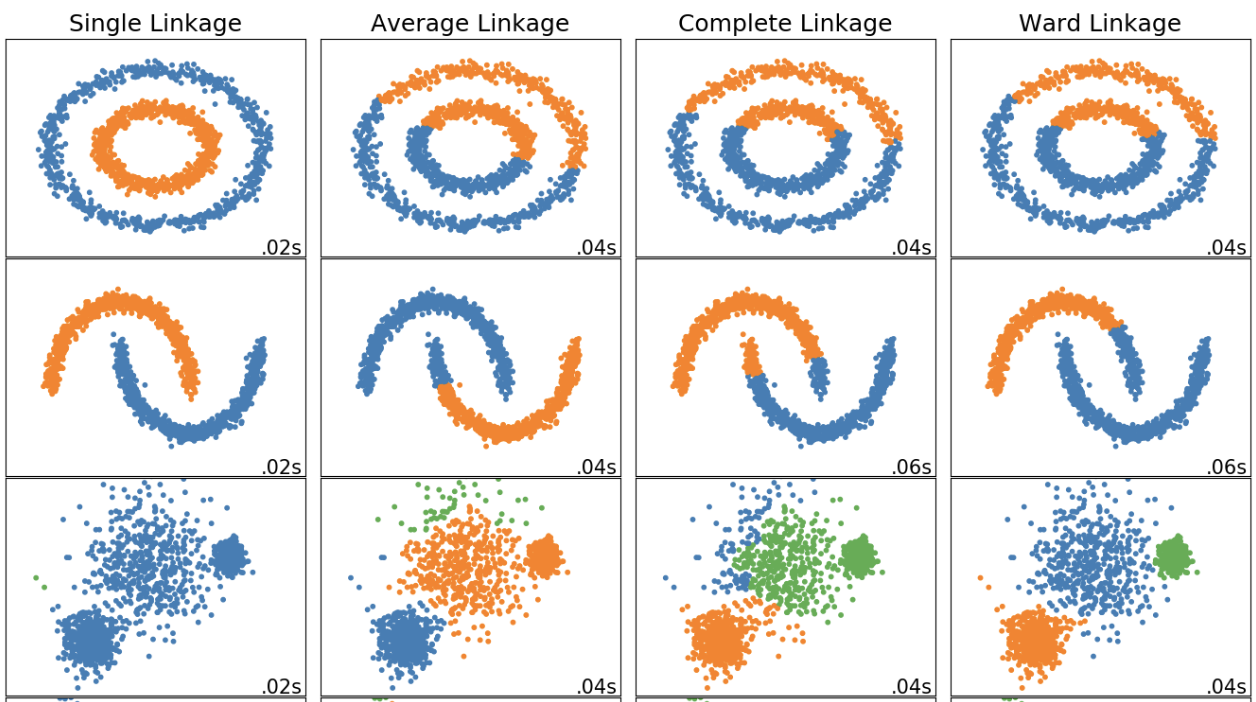
(source: https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019)

According to the dendrogram, there are four significant clusters, the same that was estimated for the k-means algorithm.

In [15]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")  
agglo.fit_predict(pca_df)

array([1, 0, 2, ..., 2, 2, 2], dtype=int64)

In [16]:
pca_df["predicted_cluster"] = agglo.labels_

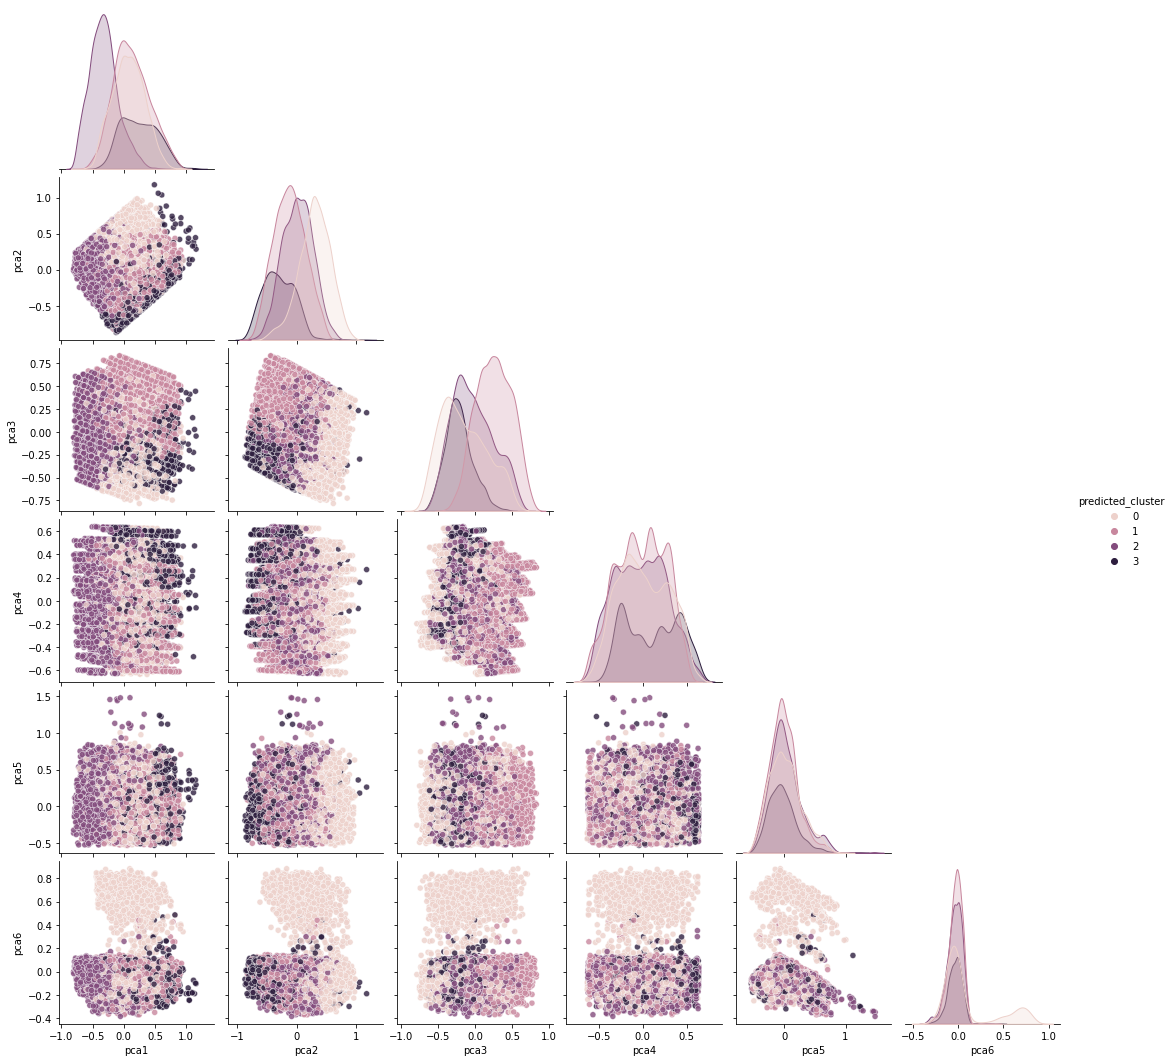

In [17]:
#matrix plot of the clusters' distribution amng the pca 
sns.pairplot(pca_df, diag_kind = "auto", corner = True, hue = "predicted_cluster", plot_kws = dict(alpha = 0.8))

In [18]:
pca_df.predicted_cluster.value_counts()

1    6042
2    5451
0    5018
3    2773
Name: predicted_cluster, dtype: int64

In this case, the model didn't divide the data into clusters equally, and we can see that there is a small cluster, number 3, that represents a sixth of the data of the largest cluster. 

In [19]:
df_sample["predicted_cluster"] = agglo.labels_

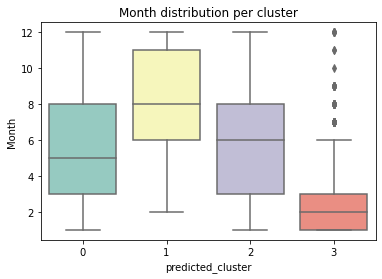

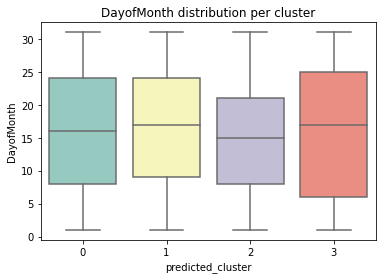

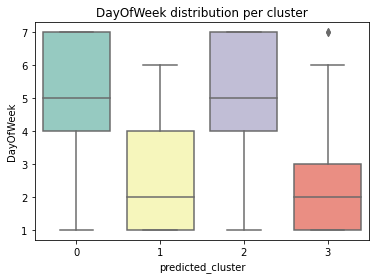

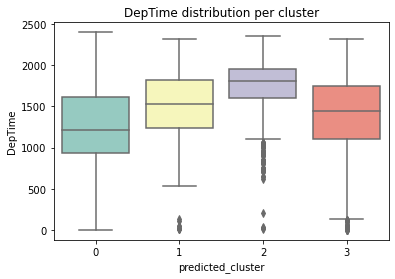

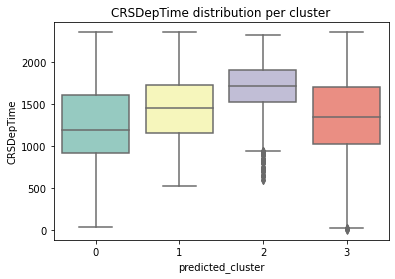

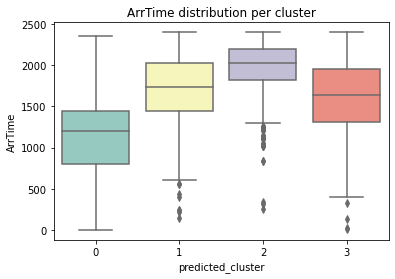

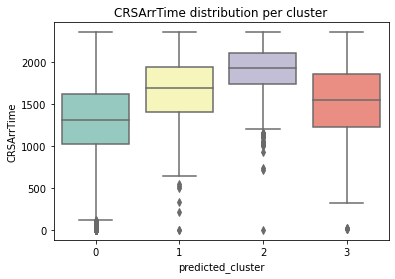

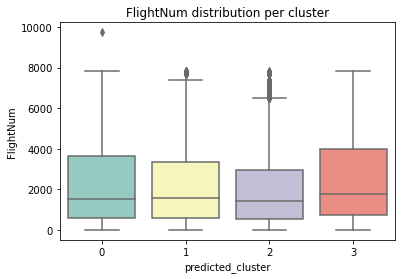

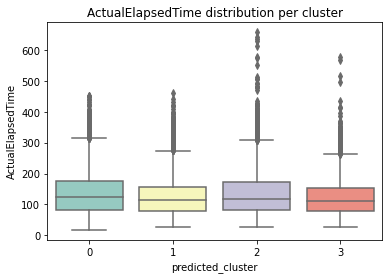

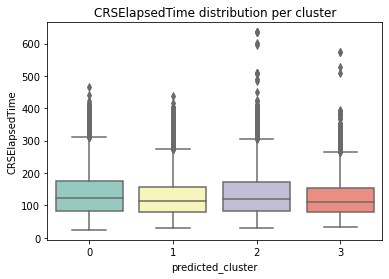

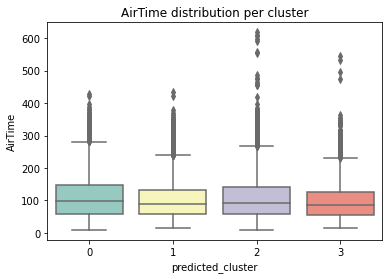

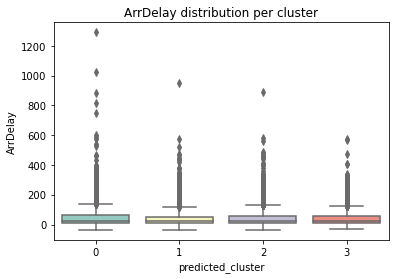

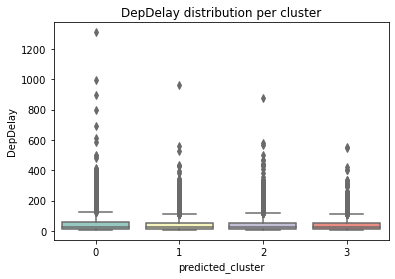

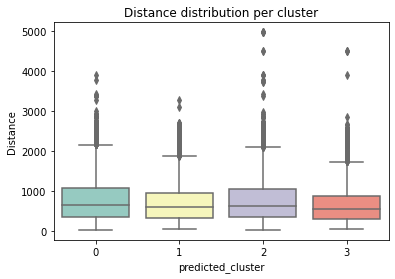

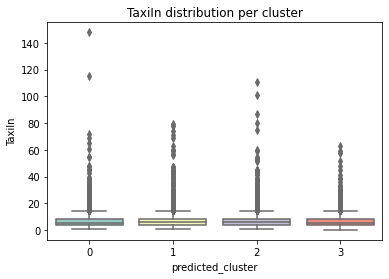

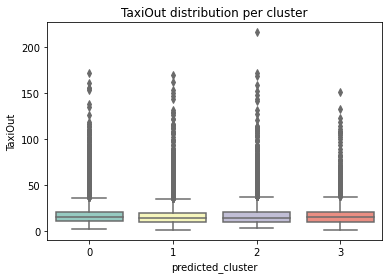

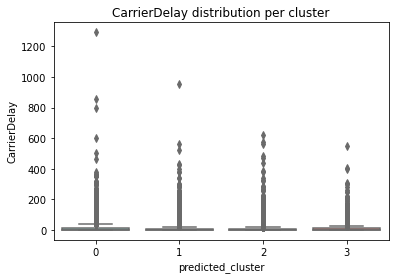

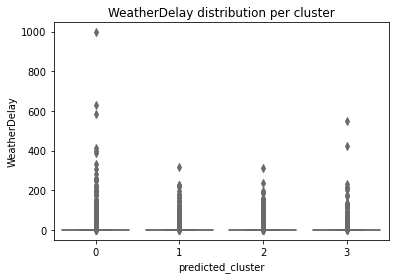

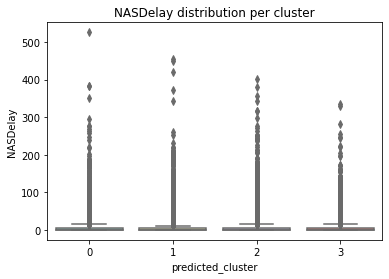

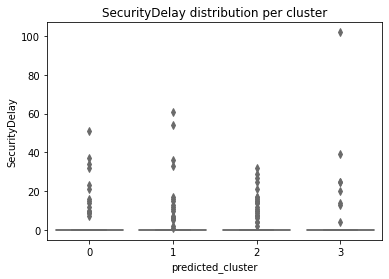

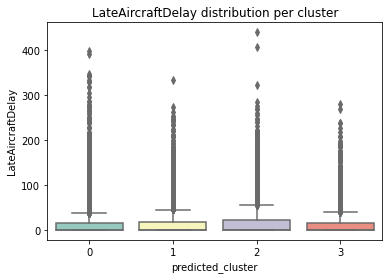

In [22]:
skip = ["UniqueCarrier", "predicted_cluster"]

for i in df_sample:
    if i in skip:
        continue
    sns.boxplot(data = df_sample, y = i, x = "predicted_cluster", palette = "Set3")
    plt.title("{} distribution per cluster".format(i))
    plt.show()

We can see that this model has divided the data differently, using Month, DayofMonth, DayofWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, and FlightNum. For example, we can tell that clusters 0 and 2 hold the flights near the weekend, and 1 and 3 early in the week, especially cluster 3.

# Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Calculate the performance of the clustering using a parameter like silhouette.

In [31]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(pca_components, kmeans.labels_).round(2)

In [32]:
kmeans_silhouette

0.15

In [25]:
agglo_silhouette = silhouette_score(pca_df, agglo.labels_).round(2)

In [26]:
agglo_silhouette

0.42

Silhouette coefficient is a metric for cluster cohesion and separation, that is, how good that clustering is. It ranges from -1 to 1, where -1 means that the clusters are wrongly assigned, and 1 means the clusters are well defined and apart from each other. A silhouette coefficient of 0 would mean that the distance between the clusters is not significant and there are no differences between each other. 

We can say that the clusters made with k-means are not very good. There is some distinction but since it is so close to 0, that means the clusters are somewhat indifferent.

Regarding the silhouette coefficient for the agglomerative hierarchical clustering, we can tell it is much better. Still, there is room to improve. Perhaps using the whole dataset we would have gotten a better result, but we had hardware limitations. 